In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Разбор датасета "Australian Credit Approval"

Задачи:
- Проверить датасет на полноту записей;
- Получить статистику по признакам;
- Построить графики для оценки сбалансированности датасета по категориальным признакам;
- Посчитать матрицу корреляции;
- Построить графики, показывающие, как влияют признаки на целевую переменную;
- Построить попарные графики для всех признаков. Для разных пар признаков могут понадобиться графики разных типов.

In [ ]:
df = pd.read_csv('/content/australian.dat.txt', sep=" ", index_col=False, 
                 names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15']) # назначим новые названия столбцов
print(df.shape)
df.head() 

(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


## Проверка полноты

In [ ]:
# выведем общую информацию о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
A1     690 non-null int64
A2     690 non-null float64
A3     690 non-null float64
A4     690 non-null int64
A5     690 non-null int64
A6     690 non-null int64
A7     690 non-null float64
A8     690 non-null int64
A9     690 non-null int64
A10    690 non-null int64
A11    690 non-null int64
A12    690 non-null int64
A13    690 non-null int64
A14    690 non-null int64
A15    690 non-null int64
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [ ]:
df.isnull().sum() # убедимся, что в датасете присутствуют все признаки

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
dtype: int64

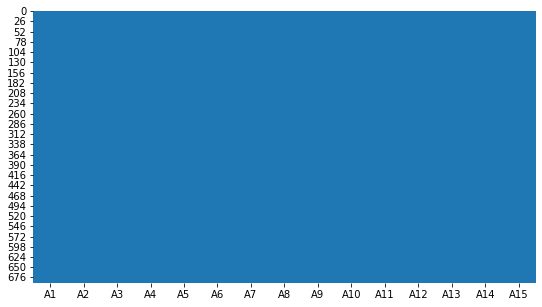

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False, cmap="tab20")
plt.show() # также можно посмотреть с помощью графика

В описании к датасету сказано, что порядка 5% изначально отсутствующих данных были заменены модой и средними значениями. Такой процент можно проигнорировать.

## Статистика по признакам

In [ ]:
# получим среднее, стандартное отклонение, минимум, максимум, квантили

df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


## Сбалансированность

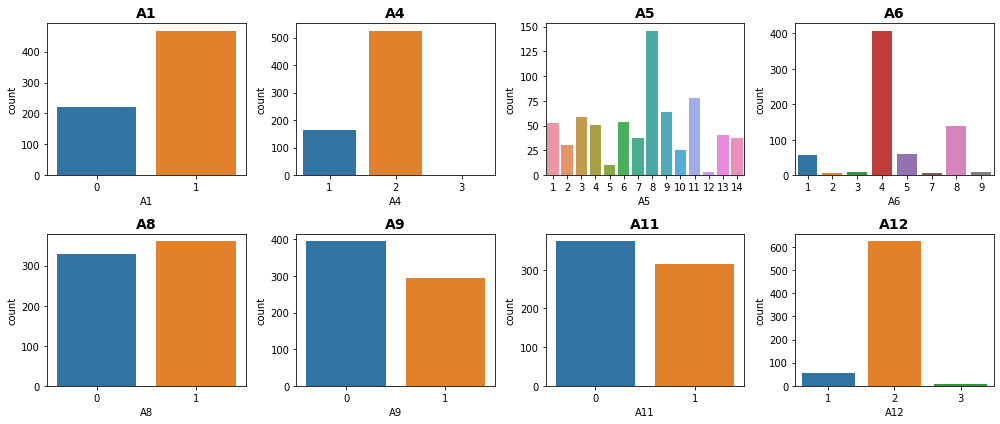

In [ ]:
cols_cat = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

nr_rows = 2
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(df[cols_cat[i]], ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')
        
plt.tight_layout()

## Матрица корреляции

In [ ]:
df_numerical = df[['A2', 'A3', 'A7', 'A10', 'A13', 'A14']] # посчитаем матрицу корреляции для числовых признаков
correlation_matrix = df_numerical.corr().round(2)
correlation_matrix

,A2,A3,A7,A10,A13,A14
A2,1.00,0.20,0.39,0.19,-0.08,0.02
A3,0.20,1.00,0.30,0.27,-0.22,0.12
A7,0.39,0.30,1.00,0.32,-0.08,0.05
A10,0.19,0.27,0.32,1.00,-0.12,0.06
A13,-0.08,-0.22,-0.08,-0.12,1.00,0.07
A14,0.02,0.12,0.05,0.06,0.07,1.00


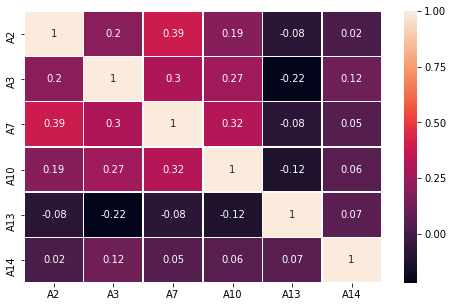

In [ ]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Высокой корреляции на наблюдается ни у одной пары признаков.

Слабая корреляция есть у признаков A2 и A7, A10 и A7, A7 и A3, A10 и A3 (положительная), A3 и A13 (отрицательная).

У остальных пар корреляция очень слабая или близка к нулю, т.е. отсутствует.

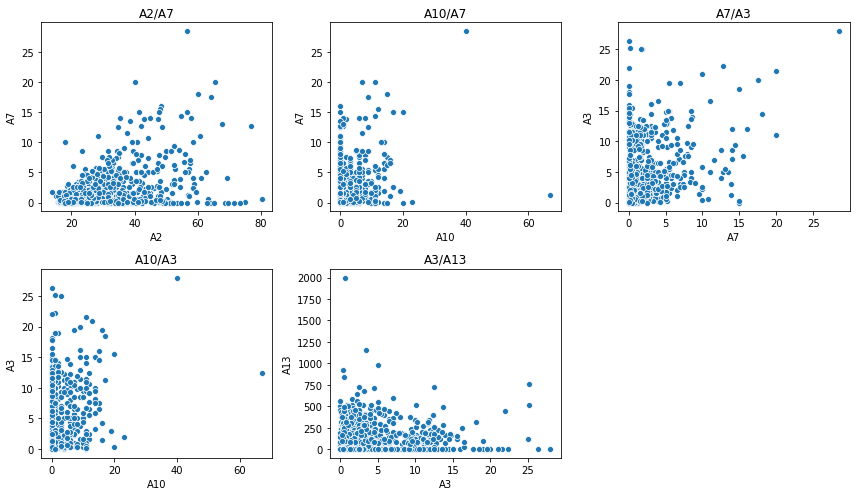

In [ ]:
# посмотрим пары этих признаков на графиках

plt.figure(figsize=(12,7))

plt.subplot(2, 3, 1)
sns.scatterplot(x=df['A2'], y=df['A7'])
plt.title ("A2/A7")

plt.subplot(2, 3, 2)
sns.scatterplot(x=df['A10'], y=df['A7'])
plt.title ("A10/A7")

plt.subplot(2, 3, 3)
sns.scatterplot(x=df['A7'], y=df['A3'])
plt.title ("A7/A3")

plt.subplot(2, 3, 4)
sns.scatterplot(x=df['A10'], y=df['A3'])
plt.title ("A10/A3")

plt.subplot(2, 3, 5)
sns.scatterplot(x=df['A3'], y=df['A13'])
plt.title ("A3/A13")

plt.tight_layout()

Здесь видно, что на значение корреляции признаков A10/A7 и A10/A3 влияют выбросы.

In [ ]:
df_binar = df[['A1', 'A8', 'A9', 'A11']] # посчитаем матрицу корреляции для бинарных признаков, которые принимают значения 1 и 0 (a/b или t/f)
correlation_matrix = df_binar.corr().round(2)
correlation_matrix

,A1,A8,A9,A11
A1,1.00,0.00,-0.06,0.05
A8,0.00,1.00,0.43,0.09
A9,-0.06,0.43,1.00,0.02
A11,0.05,0.09,0.02,1.00


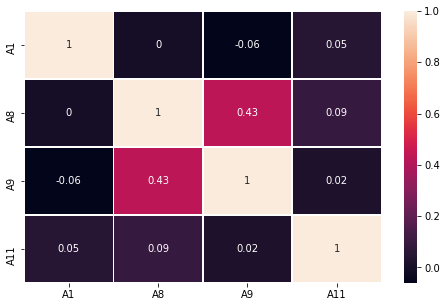

In [ ]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Слабая корреляция наблюдается у признаков A8 и A9.

У остальных пар корреляция близка к нулю, т.е. значения этих признаков у одного объекта практически никогда не совпадают.

## Влияние признаков на целевую переменную

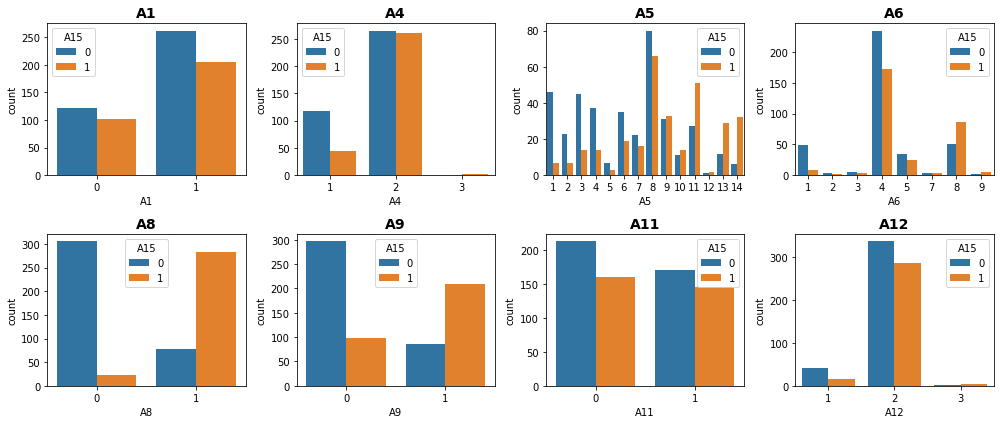

In [ ]:
cols_cat = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12'] # посмотрим зависимость целевой переменной от категориальных признаков

nr_rows = 2
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(df[cols_cat[i]], hue=df["A15"], ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')
        
plt.tight_layout()

Признаки A1, A11, A12 оказывают незначительное влияние на выдачу кредита. Такими признаками могут быть, например, пол, семейный статус или наличие детей.

Признаки A4, A6 влияют на целевую переменную в большей или меньшей степени в заивисимости от значения признака. Это может быть уровень образования и должность.

A8, A9, A5 - признаки, которые оказывают наибольшее влияние на целевую переменную, при определенных значениях доля выдачи или отказа в кредите высока. Например, при значении признака A8 равным 0, доля отказов составляет порядка 95%. Это может быть, например, наличие официального трудоустройства, наличие просрочек по предыдущим кредитам, категория зарплаты.

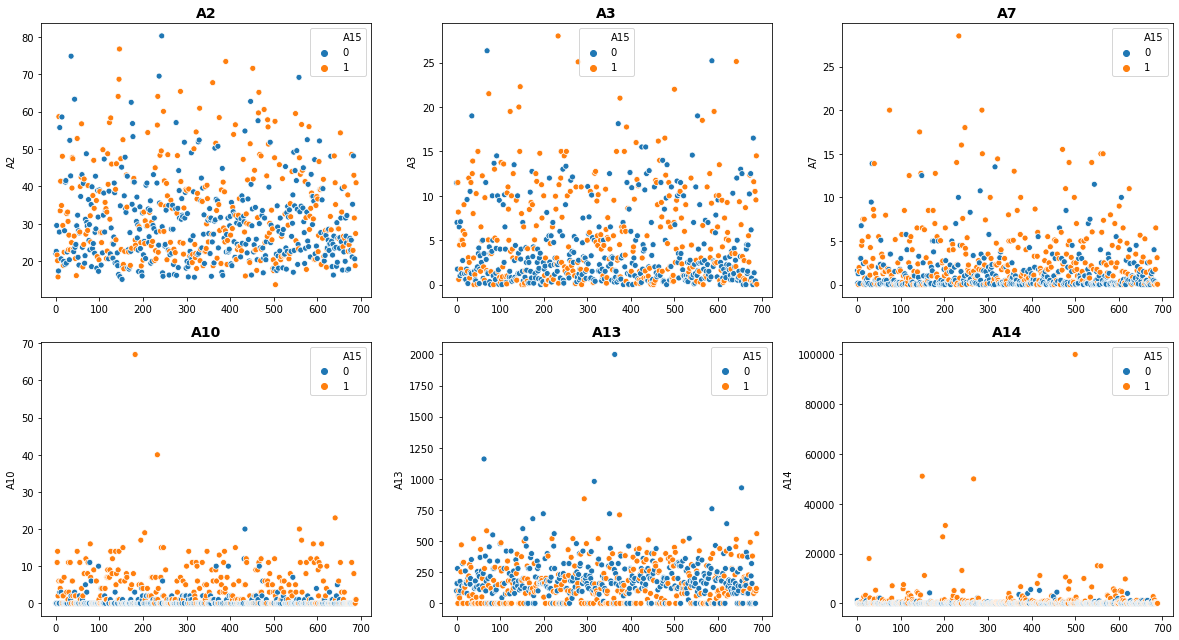

In [ ]:
cols_num = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14'] # теперь посмотрим зависимость от количественных признаков

nr_rows = 2
nr_cols = 3
x = np.arange(690)

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5.5,nr_rows*4.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.scatterplot(x=x, y=df[cols_num[i]], hue="A15", data=df, ax=ax)
        ax.set_title(cols_num[i], fontsize=14, fontweight='bold')
        
plt.tight_layout()

In [ ]:
# Признаки A10, A13, A14 принимают некоторые значения гораздо чаще

df_1 = df[df['A10'] == 0]
df_2 = df[df['A13'] == 0]
df_3 = df[df['A14'] == 1]

print(df_1.shape, df_2.shape, df_3.shape)

(395, 15) (132, 15) (295, 15)


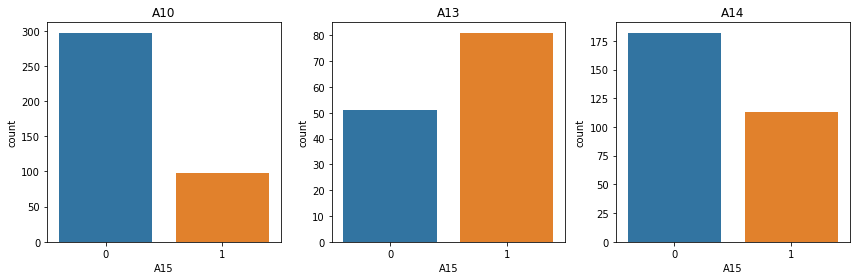

In [ ]:
# Посмотрим зависимость таких значений от целевой переменной

plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
sns.countplot(x=df_1['A15'], data=df_1)
plt.title ("A10")

plt.subplot(1, 3, 2)
sns.countplot(x=df_2['A15'], data=df_2)
plt.title ("A13")

plt.subplot(1, 3, 3)
sns.countplot(x=df_3['A15'], data=df_3)
plt.title ("A14")

plt.tight_layout()

Признаки A2, A3 оказывают незначительное влияние на выдачу кредита. Такими признаками могут быть, например, возраст или общий трудовой стаж.

Признак A7 влияет на целевую переменную больше первых двух, это может быть стаж на последнем месте работы.

A10, A13, A14 - признаки, которые оказывают наибольшее влияние на целевую переменную. К таким признакам могут относиться зарплата заемщика, размер действующих кредитов и т.д.

## Попарные графики признаков

### Категориальные признаки.

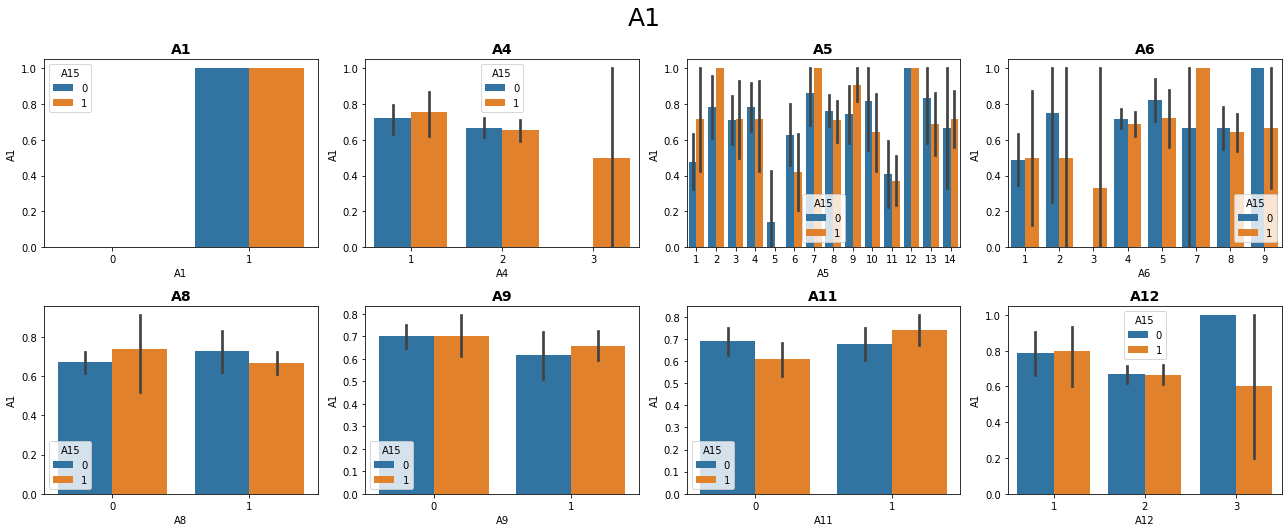

In [ ]:
# Выведем блоки с графиками отдельно для каждого категориального признака

cols_cat = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

nr_rows = 2
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.barplot(x=df[cols_cat[i]], y=df['A1'], hue='A15', data=df, ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')

fig.suptitle('A1', fontsize=25, y=1.05)
plt.tight_layout()

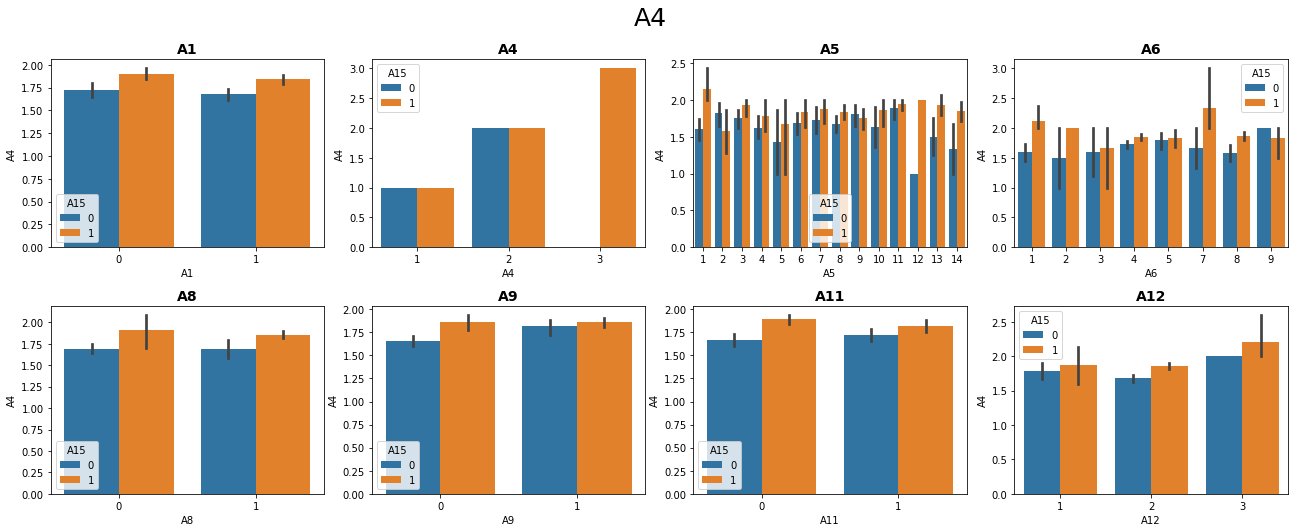

In [ ]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.barplot(x=df[cols_cat[i]], y=df['A4'], hue='A15', data=df, ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')

fig.suptitle('A4', fontsize=25, y=1.05)
plt.tight_layout()

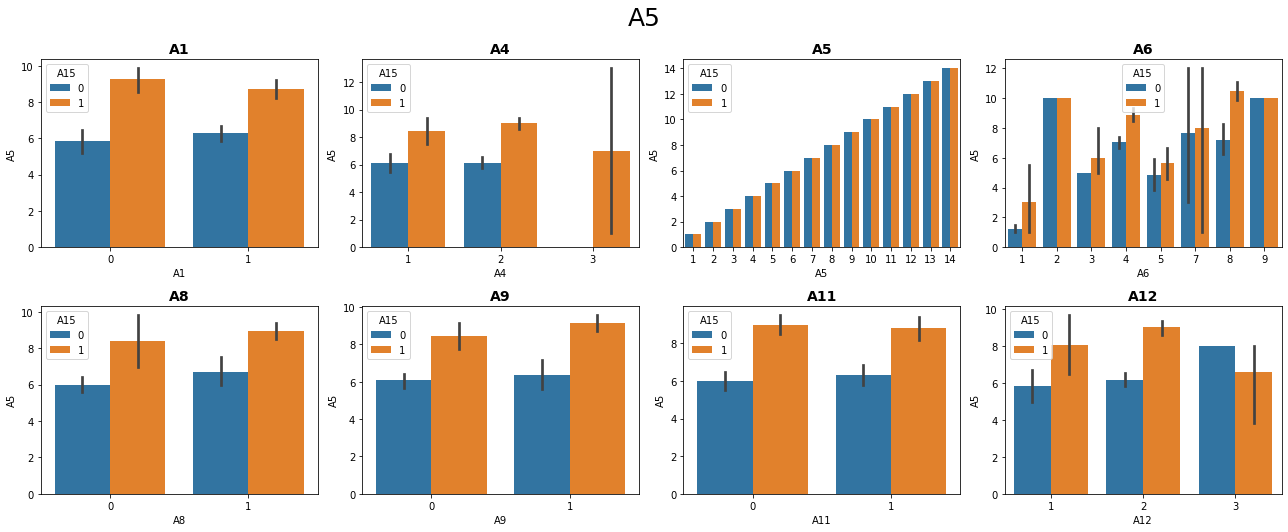

In [ ]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.barplot(x=df[cols_cat[i]], y=df['A5'], hue='A15', data=df, ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')

fig.suptitle('A5', fontsize=25, y=1.05)
plt.tight_layout()

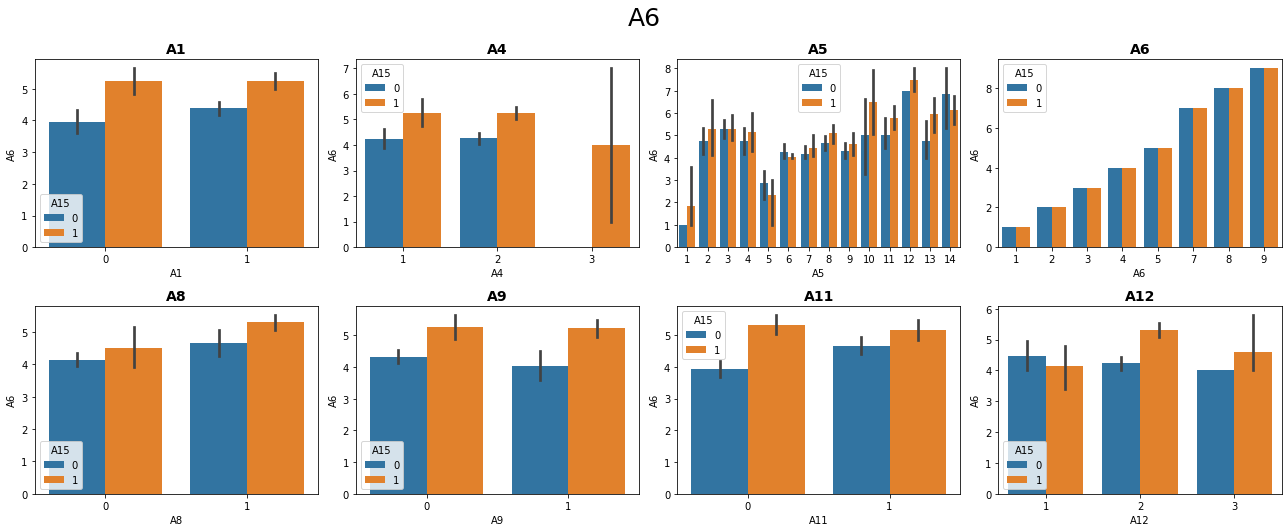

In [ ]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.barplot(x=df[cols_cat[i]], y=df['A6'], hue='A15', data=df, ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')

fig.suptitle('A6', fontsize=25, y=1.05)
plt.tight_layout()

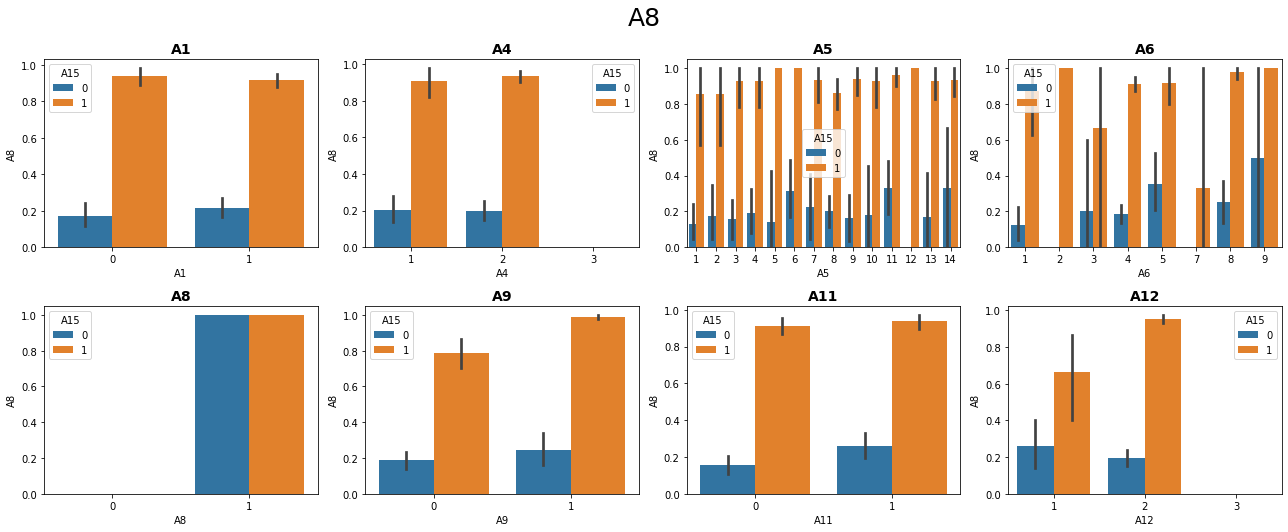

In [ ]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.barplot(x=df[cols_cat[i]], y=df['A8'], hue='A15', data=df, ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')

fig.suptitle('A8', fontsize=25, y=1.05)
plt.tight_layout()

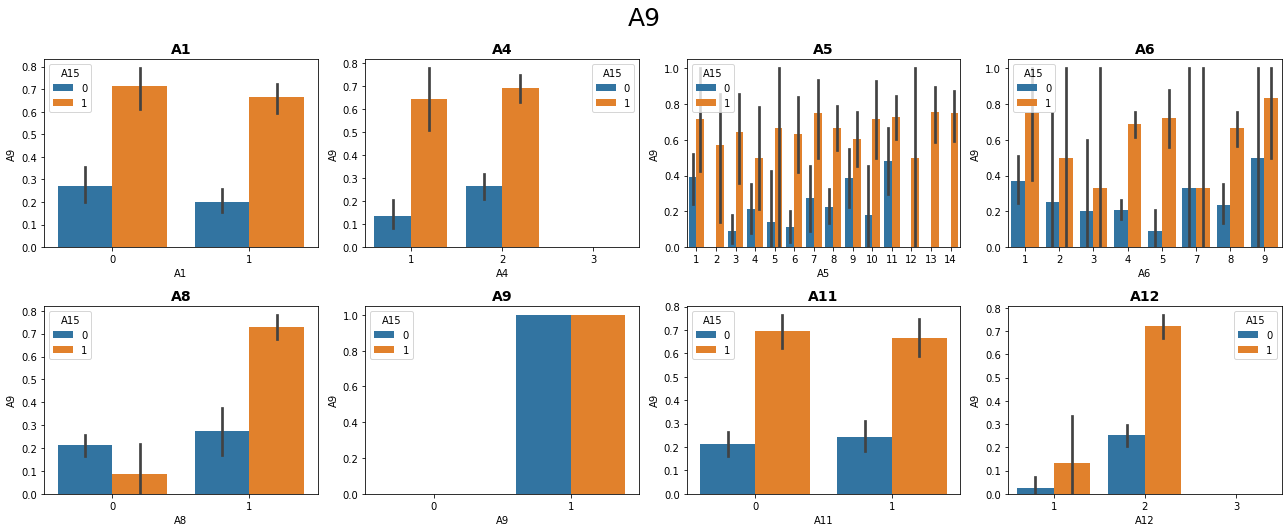

In [ ]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.barplot(x=df[cols_cat[i]], y=df['A9'], hue='A15', data=df, ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')

fig.suptitle('A9', fontsize=25, y=1.05)
plt.tight_layout()

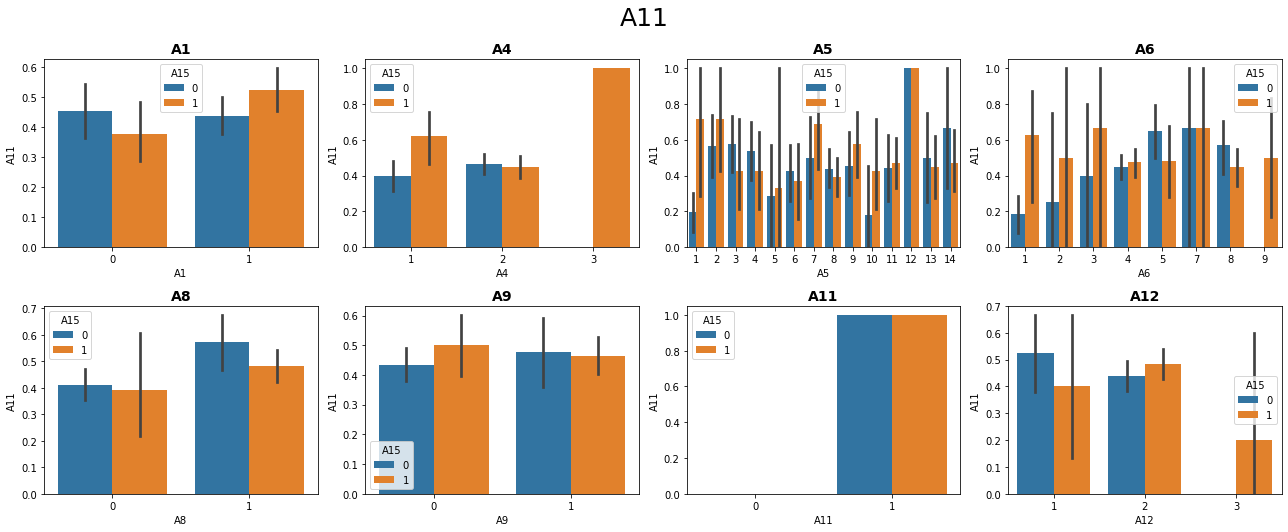

In [ ]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.barplot(x=df[cols_cat[i]], y=df['A11'], hue='A15', data=df, ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')

fig.suptitle('A11', fontsize=25, y=1.05)
plt.tight_layout()

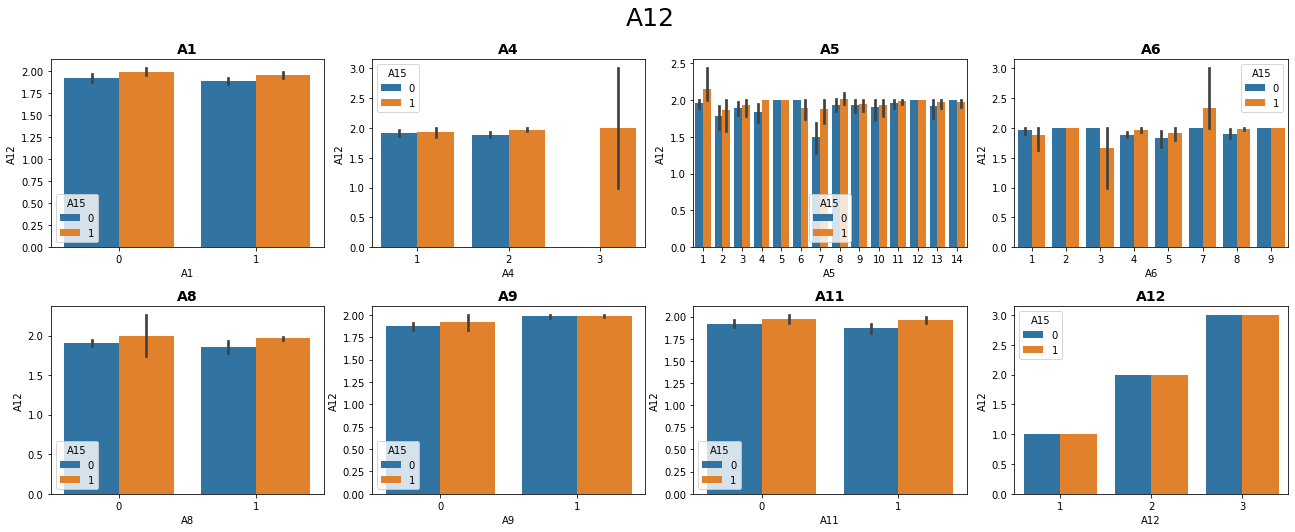

In [ ]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.barplot(x=df[cols_cat[i]], y=df['A12'], hue='A15', data=df, ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')

fig.suptitle('A12', fontsize=25, y=1.05)
plt.tight_layout()

### Числовые признаки.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


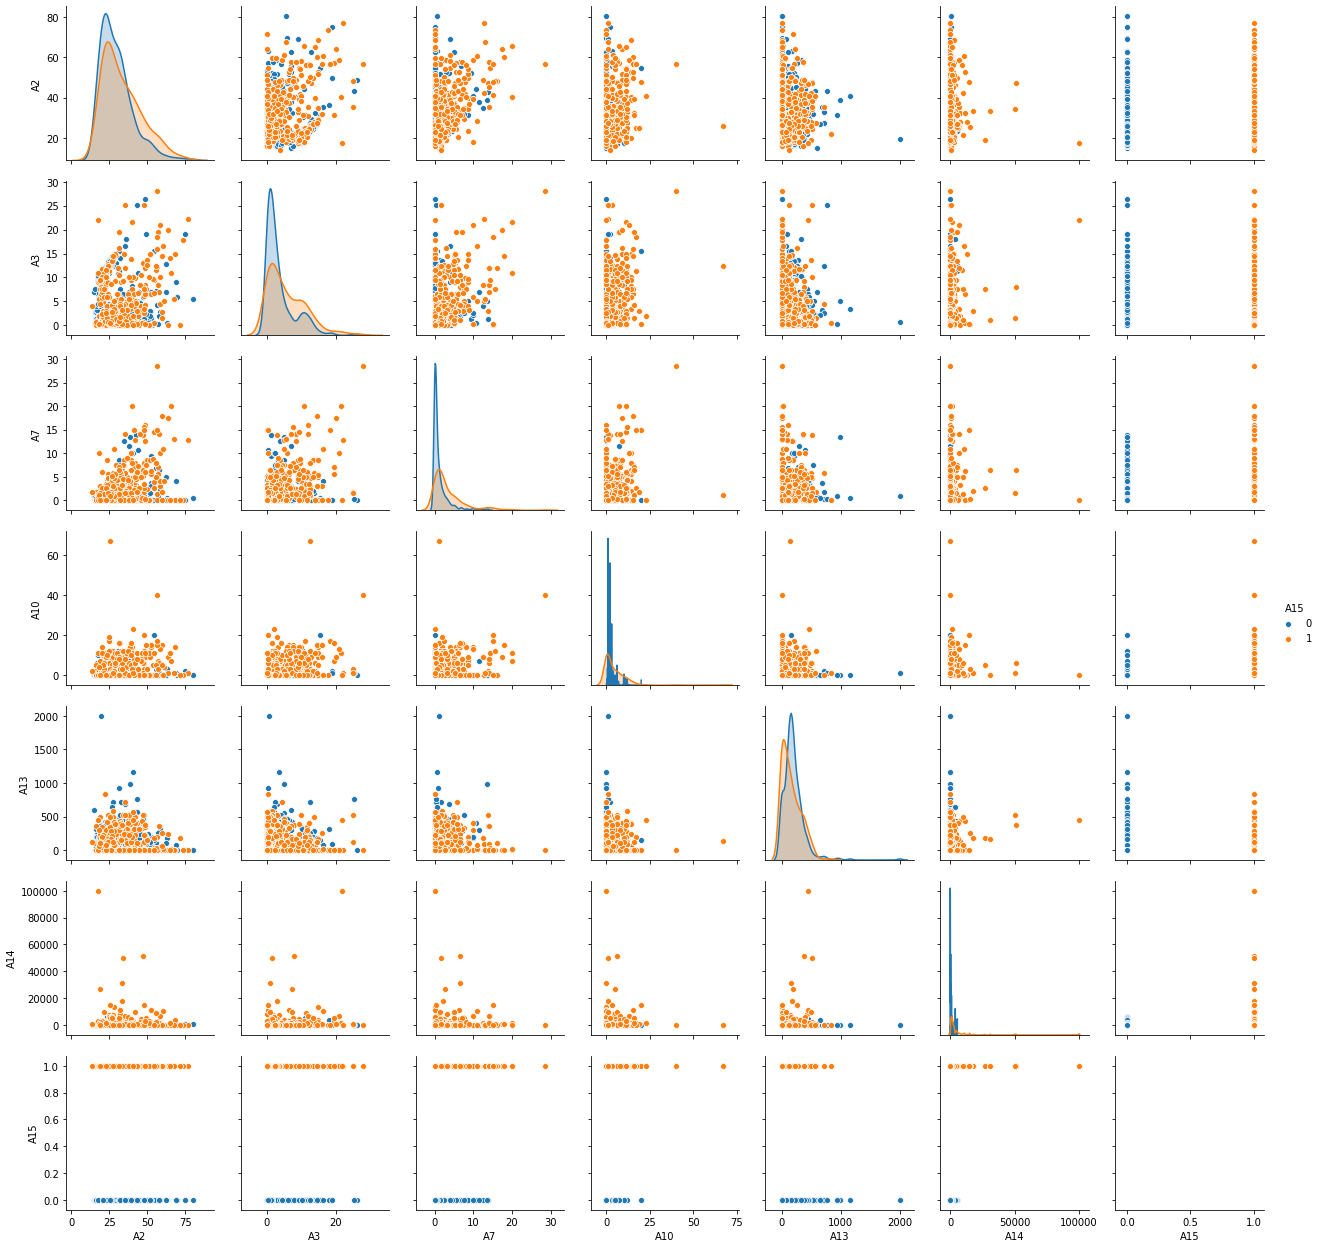

In [ ]:
df_numerical = df[['A2', 'A3', 'A7', 'A10', 'A13', 'A14', 'A15']]

matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
sns.pairplot(df_numerical, hue='A15')

### Категориальные и числовые признаки

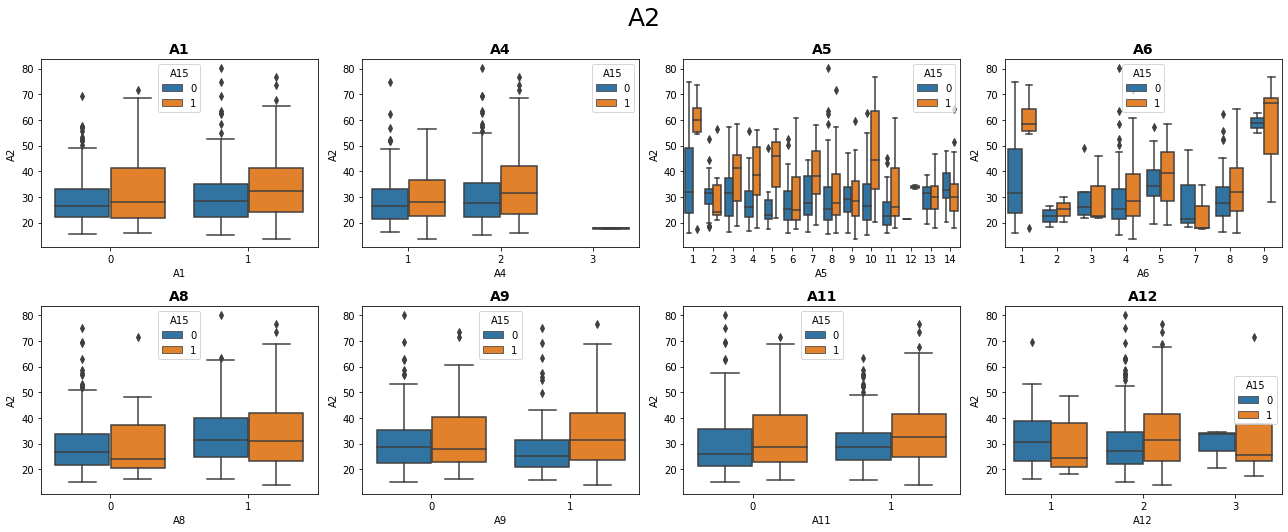

In [ ]:
# Выведем блоки с графиками отдельно для каждого количественного признака

cols_cat = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']
cols_num = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']

nr_rows = 2
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.boxplot(x=df[cols_cat[i]], y=df['A2'], hue='A15', data=df, ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')

fig.suptitle('A2', fontsize=25, y=1.05)
plt.tight_layout()

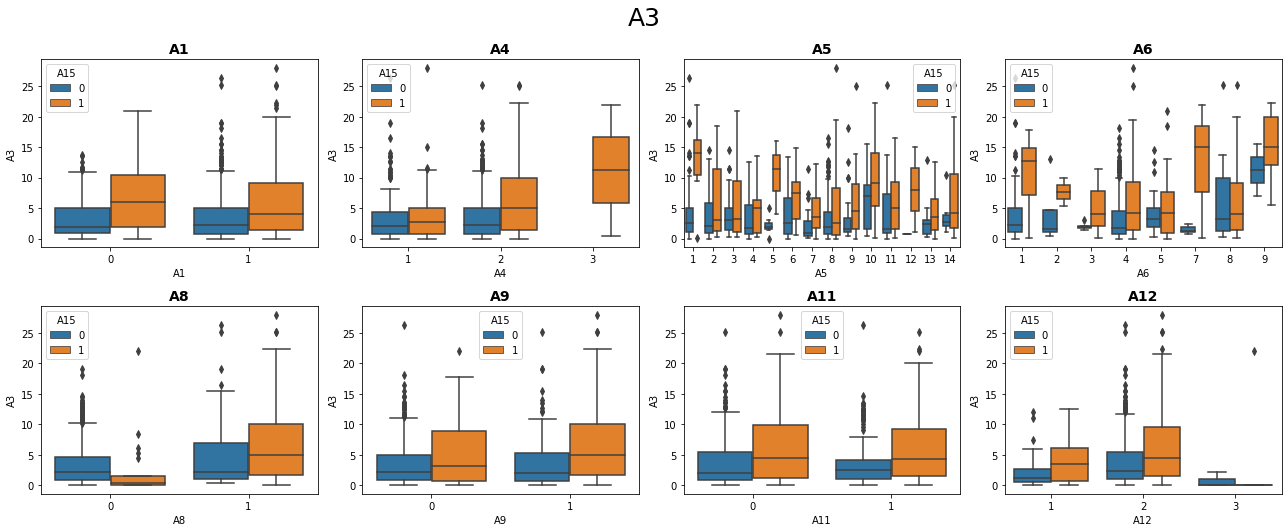

In [ ]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.boxplot(x=df[cols_cat[i]], y=df['A3'], hue='A15', data=df, ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')

fig.suptitle('A3', fontsize=25, y=1.05)
plt.tight_layout()

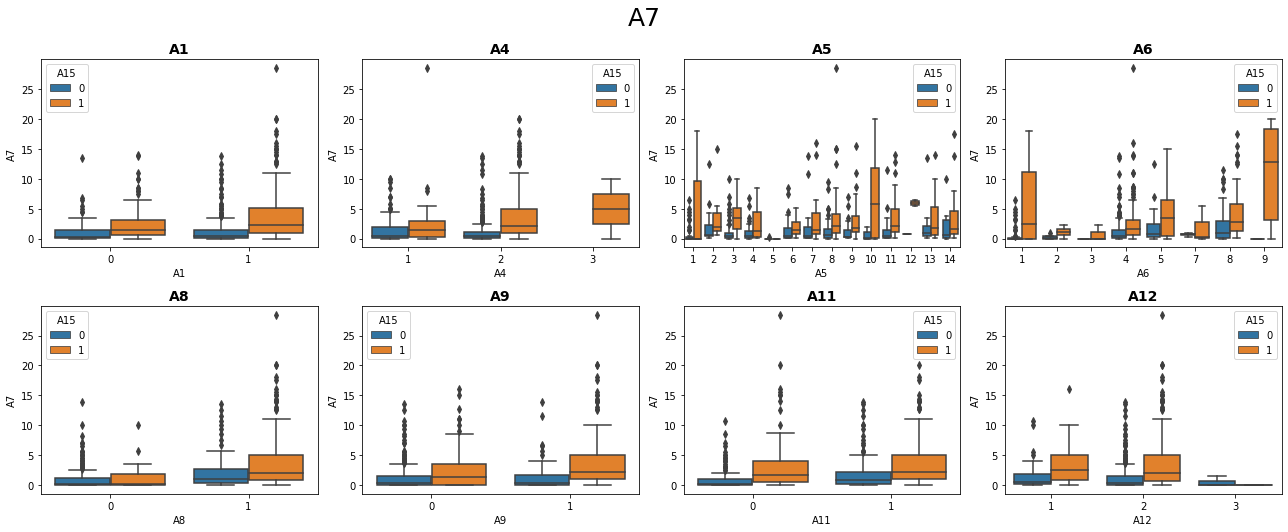

In [ ]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.boxplot(x=df[cols_cat[i]], y=df['A7'], hue='A15', data=df, ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')

fig.suptitle('A7', fontsize=25, y=1.05)
plt.tight_layout()

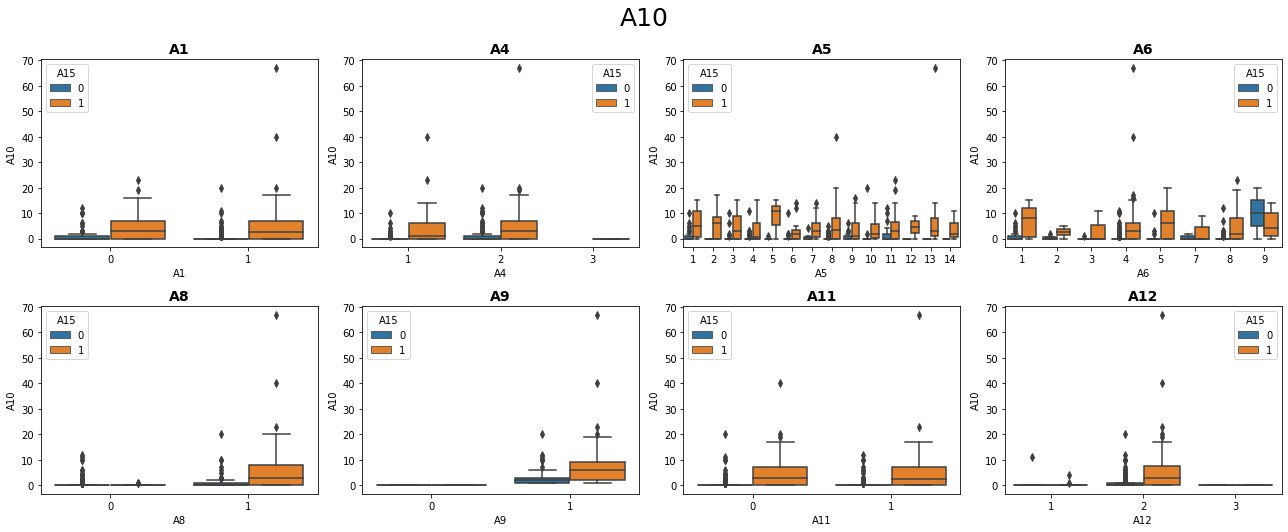

In [ ]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.boxplot(x=df[cols_cat[i]], y=df['A10'], hue='A15', data=df, ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')

fig.suptitle('A10', fontsize=25, y=1.05)
plt.tight_layout()

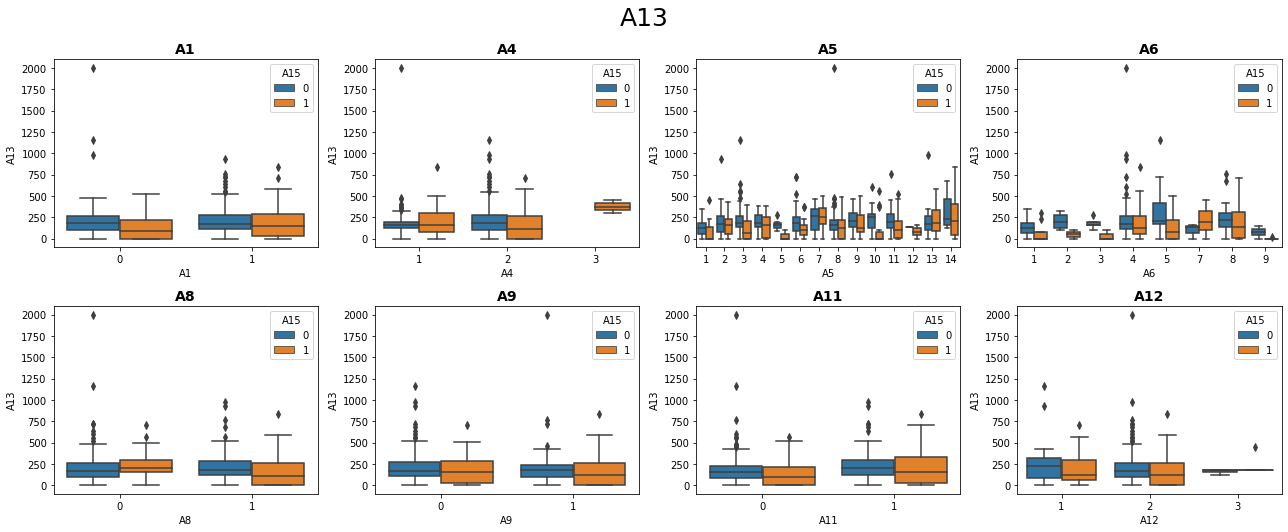

In [ ]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.boxplot(x=df[cols_cat[i]], y=df['A13'], hue='A15', data=df, ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')

fig.suptitle('A13', fontsize=25, y=1.05)
plt.tight_layout()

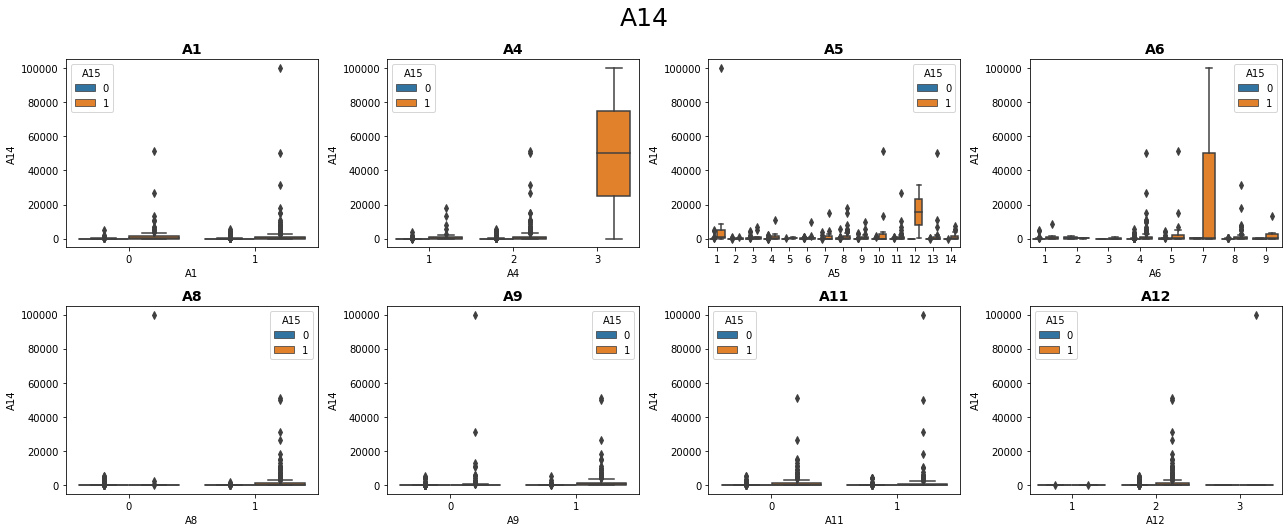

In [ ]:
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3.5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.boxplot(x=df[cols_cat[i]], y=df['A14'], hue='A15', data=df, ax=ax)
        ax.set_title(cols_cat[i], fontsize=14, fontweight='bold')

fig.suptitle('A14', fontsize=25, y=1.05)
plt.tight_layout()